In [1]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

from src.config import MODEL_PATH
from src.data_loader import load_diabetes_data
from src.preprocessing import split_features_target

C:\Users\lohan\OneDrive\Escritorio\CYGNUS\claro\claro\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bundle = joblib.load(MODEL_PATH)
model = bundle["model"]
thr_opt = bundle["optimal_threshold"]
print("Modelo cargado desde:", MODEL_PATH)
print("Umbral óptimo:", thr_opt)

Modelo cargado desde: C:\Users\lohan\DataspellProjects\MachineLearning1\models\modelo_diabetes.joblib
Umbral óptimo: 0.00033309812144309


In [3]:
bundle = joblib.load(MODEL_PATH)
model = bundle["model"]
thr_opt = bundle["optimal_threshold"]
print("Modelo cargado desde:", MODEL_PATH)
print("Umbral óptimo:", thr_opt)

df = load_diabetes_data()
X, y = split_features_target(df)

X.shape


Modelo cargado desde: C:\Users\lohan\DataspellProjects\MachineLearning1\models\modelo_diabetes.joblib
Umbral óptimo: 0.00033309812144309


(100000, 30)

In [4]:
sample_size = 2000
if sample_size < len(X):
    X_sample = X.sample(sample_size, random_state=42)
else:
    X_sample = X.copy()

X_sample.shape


(2000, 30)

In [5]:
background = X_sample.sample(min(300, len(X_sample)), random_state=42)

def model_proba_fn(data_as_numpy):
    """
    Recibe un array numpy y devuelve la probabilidad de clase positiva.
    Reconvertimos a DataFrame para que el Pipeline entienda las columnas.
    """
    data_df = pd.DataFrame(data_as_numpy, columns=X_sample.columns)
    return model.predict_proba(data_df)[:, 1]

In [6]:
explainer = shap.KernelExplainer(model_proba_fn, background)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [7]:
shap_values = explainer.shap_values(X_sample, nsamples=100)

100%|██████████| 2000/2000 [21:16<00:00,  1.57it/s]


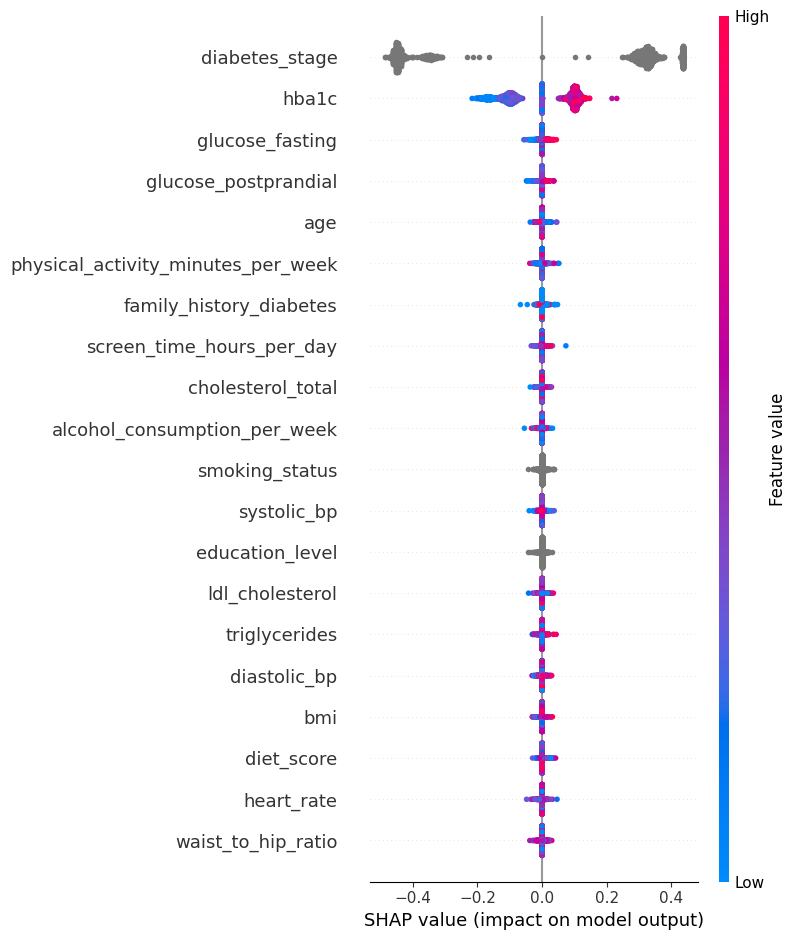

In [8]:
shap.summary_plot(shap_values, X_sample)


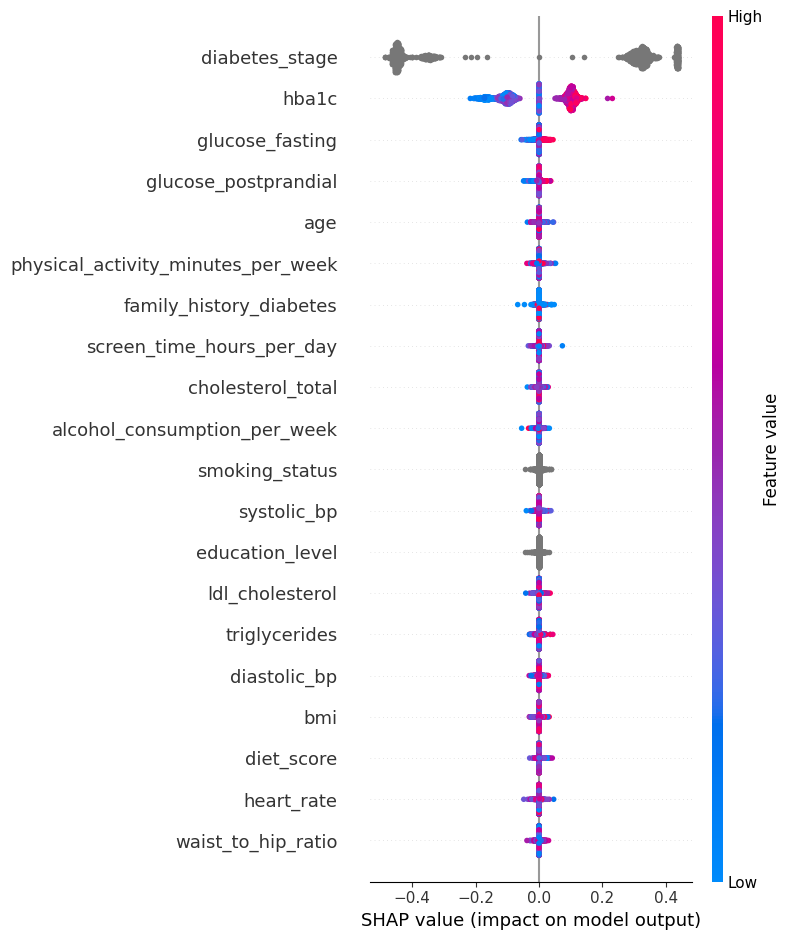

In [9]:
plt.figure()
shap.summary_plot(shap_values, X_sample, show=False)
plt.tight_layout()

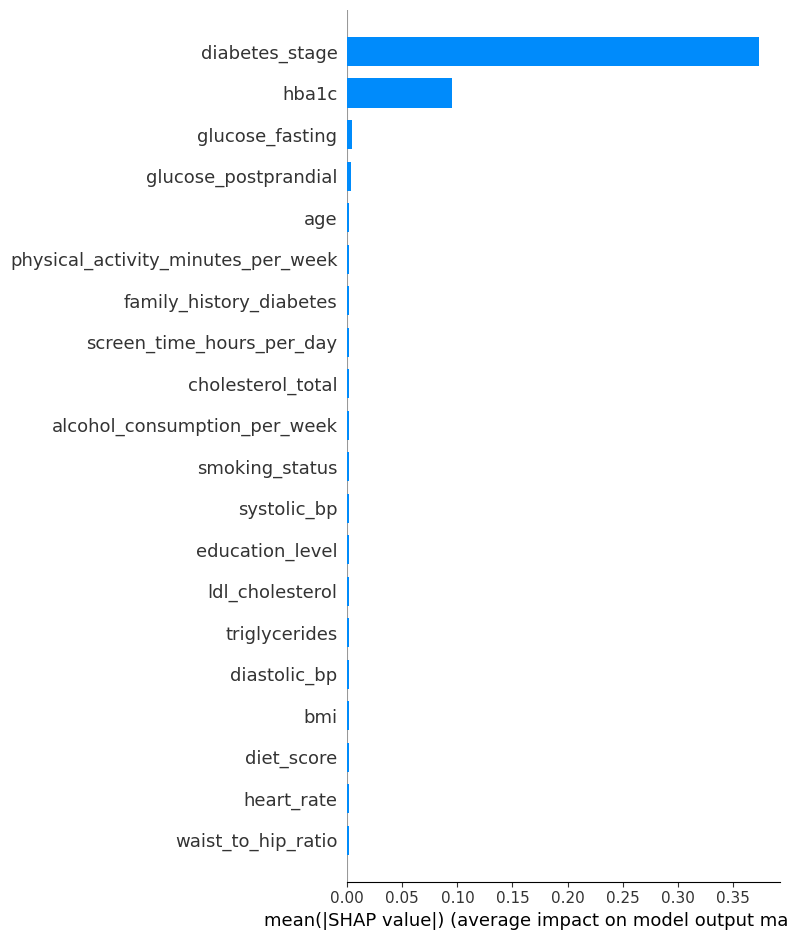

In [10]:
plt.figure()
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.tight_layout()

In [11]:
idx = 0
x_instance = X_sample.iloc[idx]

print("Ejemplo de paciente (fila) con sus variables:")
display(x_instance.to_frame().T)

Ejemplo de paciente (fila) con sus variables:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
75721,55,Female,White,Graduate,Lower-Middle,Unemployed,Current,1,55,6.4,...,232,54,160,125,85,105,3.31,5.41,29.2,No Diabetes


In [12]:
shap_value_instance = shap_values[idx]

shap.force_plot(
    explainer.expected_value,
    shap_value_instance,
    x_instance,
)